# Example notebook for generating masks with pyMOE 

In the following we exemplify how to generate masks using the generate module:
* Circular aperture (binary + save into image file) 
* Rectangular aperture  (binary + save into image file)
* Fresnel Zone Plate (binary + save into image file)
* Fresnel lens (with arbitrary number of layers + save into GDSII file using gds_klops module) 
* Arbitrary phase function (with arbitrary number of layers + save into GDSII file using gds_klops module) 

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')
sys.path.insert(0,'../../..')

## Circular aperture 

In [2]:
import pyMOE as moe 
import pyMOE.generate as gen 
import pyMOE.export as exp 

<IPython.core.display.Javascript object>


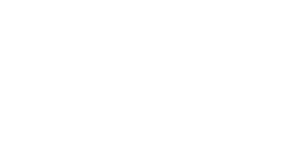

<IPython.core.display.Javascript object>


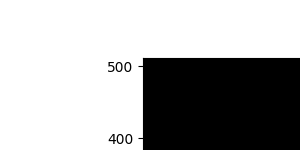

In [3]:
###Attention, the circular and rectangular apertures only save into img files 

#make circular apertures (returns also the 2D array)
npix =64
xsiz =512
ysiz = 512

#DIAMETER (not radius)  in spatial units
#centered points 
#review the name of variables? 

circ = moe.gen.circ_mask(npix, xsiz, ysiz, partial =0.25, filename = "circ.png" ,plotting=True )
#circ2 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = "circ2.png" ,plotting=True )


<IPython.core.display.Javascript object>


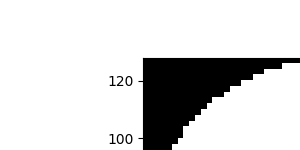

<IPython.core.display.Javascript object>


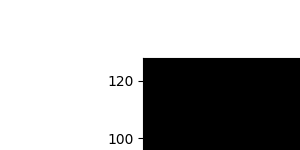

In [4]:
npix = 64
xsiz = 128
ysiz = 128

circ3 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.5, filename = None ,plotting=True );
circ4 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = None ,plotting=True );


## Rectangular aperture 

<IPython.core.display.Javascript object>


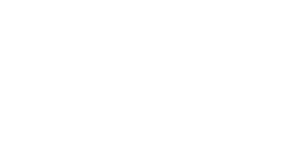

<IPython.core.display.Javascript object>


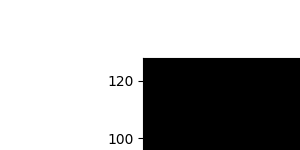

<IPython.core.display.Javascript object>


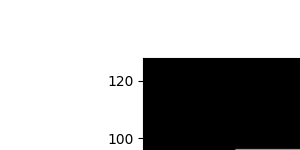

In [5]:
npix = 128
xsiz = 128
ysiz = 128 

#check ysix xsiz not square

rect = moe.gen.rect_mask(npix, xsiz, ysiz, partial =0.25, filename= "rect.png", plotting=True )
rect2 = moe.gen.rect_mask(npix, xsiz, ysiz, partial =0.5, filename= None, plotting=True )


<IPython.core.display.Javascript object>


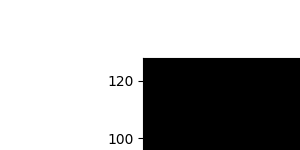

<IPython.core.display.Javascript object>


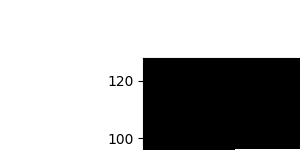

In [6]:
npix = 64
xsiz = 128
ysiz = 128

rect3 = moe.gen.rect_mask(npix, xsiz, ysiz, partial =0.25, filename= None, plotting=True )
rect4 = moe.gen.rect_mask(npix, xsiz, ysiz, partial =0.5, filename= None, plotting=True )


## Fresnel Zone Plate

<IPython.core.display.Javascript object>


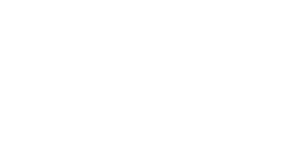

<IPython.core.display.Javascript object>


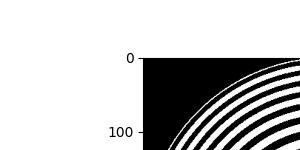

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [7]:
####generate a fresnel zone plate 

npix = 500 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgname = 'fresnel_zone_plate.tiff' # name of gds file

moe.gen.fzp_mask(npix, foc, lda, xsiz, ysiz, filename=imgname, plotting=True)

In [8]:
#Export the image into a gds  using export module 
infilxe = imgname
outfilxe = 'fresnel_zone_plate.gds'
pixelx = 1 #um 
pixely = 1 #um 
cellname = 'TOP'

moe.exp.grayim2gds(infilxe, outfilxe, pixelx, pixely,cellname, 0)

Exported the image file fresnel_zone_plate.tiff into fresnel_zone_plate.gds


## Fresnel phase mask

[-3.14158431e+00 -2.51326670e+00 -1.88494908e+00 -1.25663146e+00
 -6.28313844e-01  3.77342734e-06  6.28321391e-01  1.25663901e+00
  1.88495662e+00  2.51327424e+00  3.14159186e+00]


<IPython.core.display.Javascript object>


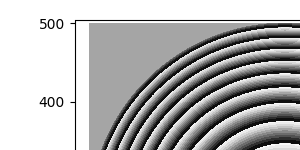

Passing contours into GDS. 
Saved the phase profile with 10 layers into the file fresnel_phase_mask.gds


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
####generate a fresnel phase mask and save it into gds  

npix = 5000 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
xsiz = 500 #x-size 
ysiz = 500 #y-size
n = 10  # number of gray levels 
gdsname = 'fresnel_phase_mask.gds' # name of gds file

moe.gen.fresnel_phase_mask(npix, foc, lda, xsiz, ysiz, n, filename=gdsname, plotting=True)

## Generate phase mask from arbitrary phase function 

<IPython.core.display.Javascript object>


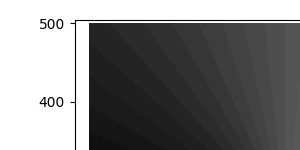

Passing contours into GDS. 
Saved the phase profile with 60 layers into the file spiral_phase_plate.gds


array([[-2.35619449, -2.35599441, -2.35579425, ..., -0.7857984 ,
        -0.78559824, -0.78539816],
       [-2.35639457, -2.35619449, -2.35599433, ..., -0.78559832,
        -0.78539816, -0.78519808],
       [-2.35659473, -2.35639465, -2.35619449, ..., -0.78539816,
        -0.785198  , -0.78499792],
       ...,
       [ 2.35659473,  2.35639465,  2.35619449, ...,  0.78539816,
         0.785198  ,  0.78499792],
       [ 2.35639457,  2.35619449,  2.35599433, ...,  0.78559832,
         0.78539816,  0.78519808],
       [ 2.35619449,  2.35599441,  2.35579425, ...,  0.7857984 ,
         0.78559824,  0.78539816]])

In [10]:
### Example with a spiral complex phase function 
#using the spiral function available in generate module 
from pyMOE.generate import * 

import numpy as np 

#attention, make sure to have enough pixels 
npix = 5000  # number of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
ltop = 1 #topological number

#spiral mask is defined as  
#spiral(x,y,x0,y0,ltop)

n = 60 # number of gray levels 
gdsfile = "spiral_phase_plate.gds"  #name of gds file 

moe.gen.phase_mask(npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename=gdsfile, plotting=True ,prec = 1e-12, mpoints = 1e9)


<IPython.core.display.Javascript object>


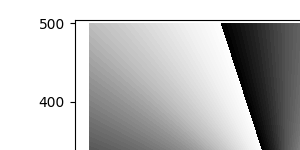

Passing contours into GDS. 
Saved the phase profile with 60 layers into the file spiral_phase_plate5.gds


array([[ 0.78539816,  0.78639856,  0.78739936, ...,  2.35419329,
         2.35519409,  2.35619449],
       [ 0.78439776,  0.78539816,  0.78639896, ...,  2.35519369,
         2.35619449,  2.35719489],
       [ 0.78339696,  0.78439736,  0.78539816, ...,  2.35619449,
         2.35719529,  2.35819569],
       ...,
       [-0.78339696, -0.78439736, -0.78539816, ..., -2.35619449,
        -2.35719529, -2.35819569],
       [-0.78439776, -0.78539816, -0.78639896, ..., -2.35519369,
        -2.35619449, -2.35719489],
       [-0.78539816, -0.78639856, -0.78739936, ..., -2.35419329,
        -2.35519409, -2.35619449]])

In [11]:
ltop = 5
moe.gen.phase_mask(npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename='spiral_phase_plate'+str(ltop)+'.gds', plotting=True ,prec = 1e-12, mpoints = 1e9)

<IPython.core.display.Javascript object>


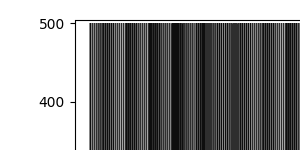

Passing contours into GDS. 
Saved the phase profile with 10 layers into the file arbitrary_function.gds


array([[ 0.13274123, -1.14543907, -2.42361938, ...,  1.27359732,
        -0.00458298, -1.28276329],
       [ 0.13274123, -1.14543907, -2.42361938, ...,  1.27359732,
        -0.00458298, -1.28276329],
       [ 0.13274123, -1.14543907, -2.42361938, ...,  1.27359732,
        -0.00458298, -1.28276329],
       ...,
       [ 0.13274123, -1.14543907, -2.42361938, ...,  1.27359732,
        -0.00458298, -1.28276329],
       [ 0.13274123, -1.14543907, -2.42361938, ...,  1.27359732,
        -0.00458298, -1.28276329],
       [ 0.13274123, -1.14543907, -2.42361938, ...,  1.27359732,
        -0.00458298, -1.28276329]])

In [12]:
### Example with a just defined function 
#using the spiral function available in generate module 
from pyMOE.generate import * 
import numpy as np 

npix = 1000  # number of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 

def fexample(x,y,x0,y0,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center 
    y0 = y-coordinate of center 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """
    sfunc =  a * (x)  -b
    func = np.exp(1.0j* sfunc)

    return func

aval = 10
bval = 25 
n = 10 # number of gray levels 
gdsfile = "arbitrary_function.gds"  #name of gds file 

moe.gen.phase_mask(npix, xsiz, ysiz,n, fexample, a= aval, b = bval, \
           filename=gdsfile, plotting=True ,prec = 1e-12, mpoints = 1e9)


<IPython.core.display.Javascript object>


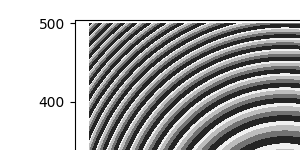

Passing contours into GDS. 
Saved the phase profile with 5 layers into the file fresnel_phase_plate_selecrad.gds


array([[1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       ...,
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892]])

In [13]:
#Select exact position of contours  in phase 

phas_vals = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]

moe.gen.phase_mask(5000, 500,500, len(phas_vals),\
           lensfres, fo=5000, lda=0.6328, \
           filename="fresnel_phase_plate_selecrad.gds", plotting=True ,\
                   prec = 1e-6, mpoints = 1e9, zlevs =phas_vals    )

<IPython.core.display.Javascript object>


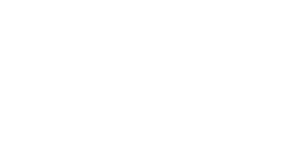

<IPython.core.display.Javascript object>


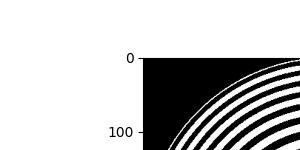

<IPython.core.display.Javascript object>


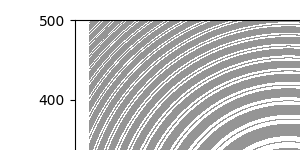

Passing contours into GDS. 
Saved the phase profile with 2 layers into the file fresnel_phase_plate_selecrad.gds


array([[1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       ...,
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892]])

In [14]:
####generate a fresnel zone plate  and compare with the obtained when selecting the phases 

npix = 500 # nr of pixels 
foc = 5000 # focal distance in um 
ldar = 0.6328 #wavelength in um 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgname = 'fresnel_zone_plate.tiff' # name of gds file

moe.gen.fzp_mask(npix, foc, lda, xsiz, ysiz, filename=imgname, plotting=True)

phas_vals = [-np.pi/2, np.pi/2]

moe.gen.phase_mask(foc, xsiz,ysiz, len(phas_vals),\
           lensfres, fo=foc, lda=ldar, \
           filename="fresnel_phase_plate_selecrad.gds", plotting=True ,\
                   prec = 1e-6, mpoints = 1e9, zlevs =phas_vals    )

<IPython.core.display.Javascript object>


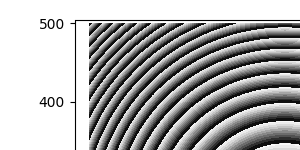

Passing contours into GDS. 
Saved the phase profile with 11 layers into the file fresnel_phase_plate_selecrad2.gds


array([[1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       ...,
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892]])

In [15]:
#position of the contours in phase
phas2 = np.linspace(-np.pi, np.pi, 11 )


moe.gen.phase_mask(5000, 500,500,len(phas2),\
           lensfres, fo=5000, lda=0.6328, \
           filename="fresnel_phase_plate_selecrad2.gds",\
                plotting=True ,prec = 1e-6, mpoints = 1e9, zlevs = phas2)